Creating a Linear Regression model to predict the Initial Investment required for a franchise based on the Annual Fee charged by the franchisor.

# Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels

# Exploratory Data Analysis 

Our dataframe is composed of two columns: "FraAnual", which stores the Annual Rate values, and "CusInic", which contains the Initial Investment values.

In [3]:
# Calling the dataframe "slr12.csv"
data = pd.read_csv("C:/Users/carol/Analise_de_dados_py/Udemy/FormacaoCD/22.Prática em Python/scripts/slr12.csv", sep=";")

In [4]:
# Checking the shape of the dataframe
print(data.shape)

(36, 2)


In [5]:
# Showing the first 5 rows of the dataframe
print(data.head())

   FrqAnual  CusInic
0      1000     1050
1      1125     1150
2      1087     1213
3      1070     1275
4      1100     1300


In [6]:
# Checking NA's and abnormal values in the dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   FrqAnual  36 non-null     int64
 1   CusInic   36 non-null     int64
dtypes: int64(2)
memory usage: 708.0 bytes
None


In [7]:
# Summary statistics for each column in the dataframe
print(data[['FrqAnual', 'CusInic']].describe())

          FrqAnual      CusInic
count    36.000000    36.000000
mean   1134.777778  1291.055556
std     158.583211   124.058038
min     700.000000  1050.000000
25%    1080.000000  1250.000000
50%    1162.500000  1277.500000
75%    1250.000000  1300.000000
max    1375.000000  1830.000000


The dataframe does not present NA's or outliners to be treated in any of the columns.

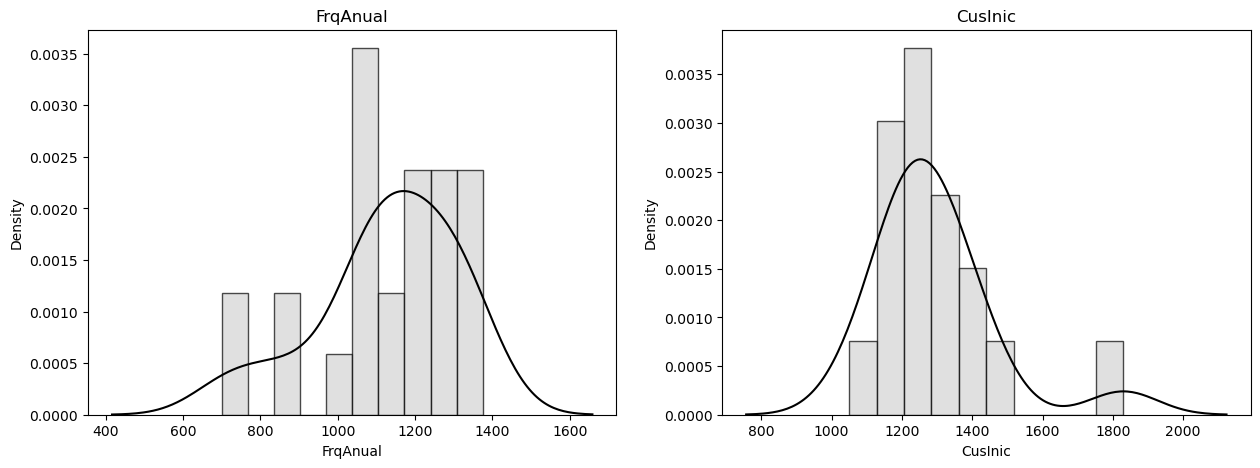

In [33]:
# Visualizing the data with the help of histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

for i, column in enumerate(['FrqAnual', 'CusInic']):
    classes = data[column].value_counts().sort_index()

    # Plot histogram
    axes[i].hist(classes.index, density=True, bins=10, color='lightgray', alpha=0.7, edgecolor='black')

    # Add density curve using seaborn kdeplot
    sns.kdeplot(classes.index, ax=axes[i], color='black')

    axes[i].set_title(column)

plt.show()

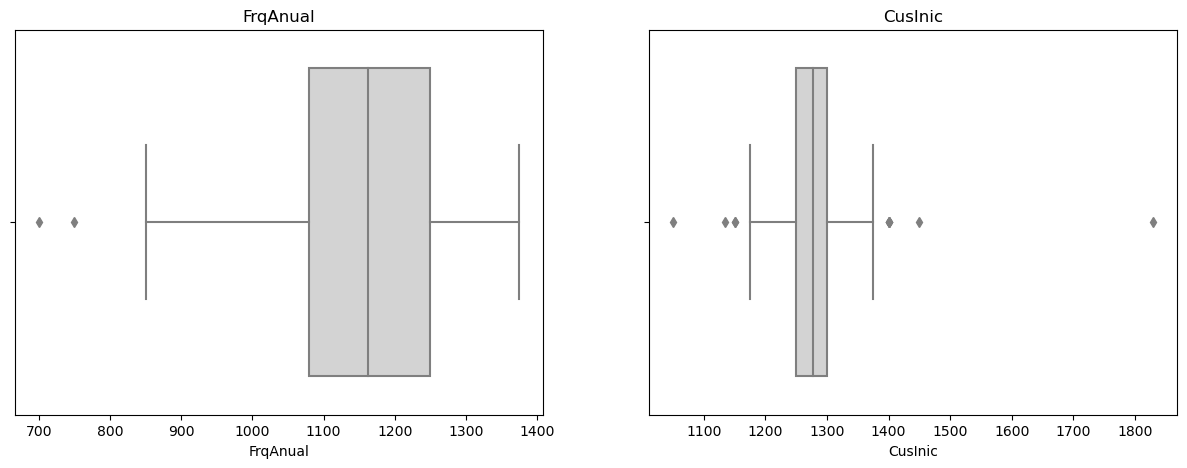

In [35]:
# Visualizing the data with the help of boxplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

for i, column in enumerate(['FrqAnual', 'CusInic']):
    # Plot boxplot
    sns.boxplot(x=column, data=data, ax=axes[i], color='lightgray')
    
    axes[i].set_title(column)

plt.show()

# Creating the Linear Regression Model

In [36]:
# Checking the correlation of variables
correlation = data[['FrqAnual', 'CusInic']].corr()
print(correlation)

          FrqAnual   CusInic
FrqAnual  1.000000  0.477007
CusInic   0.477007  1.000000


In [40]:
# Defining the variables: FrqAnual is the independent variable and CusInic is the dependent variable
x = data.iloc[:, 0].values
y = data.iloc[:, 1].values
# Matrix format with one more column
x = x.reshape(-1, 1) 

In [41]:
# Model creation 
model = LinearRegression()
# Training
model.fit(x, y)

LinearRegression()

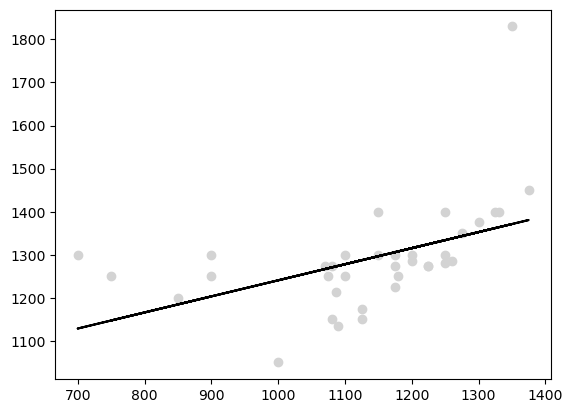

In [45]:
# Comparing the original data with the predicted model with a scatter plot
plt.scatter(x, y, color = 'lightgray')
plt.plot(x, modelo.predict(x), color = 'black')

# Predicting

In [49]:
# Predicting new values for the Initial Investment 
new_val =  1250
print("The Initial Investment required for a franchise with Annual Fee of 1250 is", model.predict([[new_val]])[0])

The Initial Investment required for a franchise with Annual Fee of 1250 is 1334.051642173137
